In [4]:
import glob
files = glob.glob("rawdataset/*")

In [41]:
import pandas as pd

data = {}
for i in files:
    temp = pd.read_csv(i)
    data[i.replace(".csv","")] = temp

In [42]:
for key, values in data.items():
    print "\n" + key + "\n"
    print values.head()


rawdataset/quarterly_apt_vacancy

      Date Vacancy Rate
0  Q1 1999         6.4%
1  Q2 1999         4.1%
2  Q3 1999         3.3%
3  Q4 1999         2.7%
4  Q1 2000         2.4%

rawdataset/monthly_home_prices

     Date Single Family Home Condo/Townhome
0  Jan-00           $407,250       $235,000
1  Feb-00           $424,980       $254,450
2  Mar-00           $429,975       $259,950
3  Apr-00           $435,000       $279,950
4  May-00           $449,999       $269,950

rawdataset/PublishAffordablehousing9212016 (1)

   #                  Development Name                           Address  \
0  1                  101 San Fernando    101 E.San Fernando St, Ste 100   
1  2  127 and 110 #22 Roundtable - NSP  110, bldg 22, 127 Roundtable Dr.   
2  3                         1713 Ross                  1713 Ross Circle   
3  4                         1726 Ross                  1726 Ross Circle   
4  5                         1731 Ross                  1731 Ross Circle   

                  

In [43]:
monthy_home_prices = data['rawdataset/monthly_home_prices']
monthy_home_prices.head()

,Date,Single Family Home,Condo/Townhome
0,Jan-00,"$407,250","$235,000"
1,Feb-00,"$424,980","$254,450"
2,Mar-00,"$429,975","$259,950"
3,Apr-00,"$435,000","$279,950"
4,May-00,"$449,999","$269,950"


In [85]:
def convert_to_quarter(x):
    if x[0].isdigit():
        month = x[-3:]
        if "-" in x[:2]:
            year = x[0]
        else:
            year = x[:2]
    else:
        month,year = x[:3],x[4:]
    if month in ["Jan", "Feb",'Mar']:
        return "Q1 200" + year
    if month in ["Apr","May","Jun"]:
        return "Q2 200" + year
    if month in ["Jul", "Aug", "Sep"]:
        return "Q3 200" + year
    return "Q4 200" + year

def pretty_year(x):
    temp =x.split(" ")
    if len(temp[1]) > 4:
        return temp[0]+ " " +temp[1].replace("0", "",1)
    return x

monthy_home_prices["Quarter"] = monthy_home_prices['Date'].apply(convert_to_quarter)
monthy_home_prices["Quarter"] = monthy_home_prices["Quarter"].apply(pretty_year)
monthy_home_prices.head()


,Date,Single Family Home,Condo/Townhome,Quarter
0,Jan-00,"$407,250","$235,000",Q1 2000
1,Feb-00,"$424,980","$254,450",Q1 2000
2,Mar-00,"$429,975","$259,950",Q1 2000
3,Apr-00,"$435,000","$279,950",Q2 2000
4,May-00,"$449,999","$269,950",Q2 2000


In [86]:
monthy_home_prices.drop(['Date'], axis = 1)
monthy_home_prices.head()

,Date,Single Family Home,Condo/Townhome,Quarter
0,Jan-00,"$407,250","$235,000",Q1 2000
1,Feb-00,"$424,980","$254,450",Q1 2000
2,Mar-00,"$429,975","$259,950",Q1 2000
3,Apr-00,"$435,000","$279,950",Q2 2000
4,May-00,"$449,999","$269,950",Q2 2000


In [87]:
temp = monthy_home_prices[['Single Family Home','Condo/Townhome']].replace('[$,]',"",regex = True).astype(float)
temp["Quarter"] = monthy_home_prices['Quarter']

In [88]:
temp.head()

,Single Family Home,Condo/Townhome,Quarter
0,407250.0,235000.0,Q1 2000
1,424980.0,254450.0,Q1 2000
2,429975.0,259950.0,Q1 2000
3,435000.0,279950.0,Q2 2000
4,449999.0,269950.0,Q2 2000


In [90]:
processed_monthy_home_prices = temp.groupby(['Quarter']).mean()

In [92]:
quarterly_apt_vacancy = data['rawdataset/quarterly_apt_vacancy']
quarterly_apt_vacancy.head(20)

,Date,Vacancy Rate
0,Q1 1999,6.4%
1,Q2 1999,4.1%
2,Q3 1999,3.3%
3,Q4 1999,2.7%
4,Q1 2000,2.4%
5,Q2 2000,0.7%
6,Q3 2000,1.3%
7,Q4 2000,1.5%
8,Q1 2001,2.3%
9,Q2 2001,5.1%


In [93]:
quarterly_apt_vacancy.shape

(70, 2)

In [103]:
quarterly_apt_vacancy= quarterly_apt_vacancy.rename(columns={"Date" : "Quarter"})
quarterly_apt_vacancy.head()

,Quarter,Vacancy Rate
0,Q1 1999,6.4%
1,Q2 1999,4.1%
2,Q3 1999,3.3%
3,Q4 1999,2.7%
4,Q1 2000,2.4%


In [112]:


processed_monthy_home_prices = processed_monthy_home_prices.reset_index()

In [113]:
#only choose quarter from 2000 to 2015, eliminate 1999 and 2016
temp = quarterly_apt_vacancy.merge(processed_monthy_home_prices, how = 'inner', on = "Quarter")
temp.head()

,Quarter,Vacancy Rate,Single Family Home,Condo/Townhome
0,Q1 2000,2.4%,420735.000000,249800.000000
1,Q2 2000,0.7%,448306.000000,279596.000000
2,Q3 2000,1.3%,460641.666667,289666.666667
3,Q4 2000,1.5%,491000.000000,306300.000000
4,Q1 2001,2.3%,499681.333333,322466.666667


In [117]:
def replace_percentage(x):
    if type(x) is str:
        x = x.replace("%","")
    return float(x)/100

temp['Vacancy Rate'] = temp['Vacancy Rate'].apply(replace_percentage)
temp.head()

,Quarter,Vacancy Rate,Single Family Home,Condo/Townhome
0,Q1 2000,0.024,420735.000000,249800.000000
1,Q2 2000,0.007,448306.000000,279596.000000
2,Q3 2000,0.013,460641.666667,289666.666667
3,Q4 2000,0.015,491000.000000,306300.000000
4,Q1 2001,0.023,499681.333333,322466.666667


In [118]:
quarterly_apt_rent = data['rawdataset/quarterly_apt_rent']
quarterly_apt_rent.head()

,Date,Average,1 bed / 1 ba,2 bed / 2 ba
0,Q1 1999,1208,1098,1453
1,Q2 1999,1215,1101,1464
2,Q3 1999,1242,1135,1487
3,Q4 1999,1264,1153,1514
4,Q1 2000,1298,1180,1556


In [119]:
quarterly_apt_rent = quarterly_apt_rent.rename(columns={'Date':'Quarter'})
temp = temp.merge(quarterly_apt_rent, how='inner',on = 'Quarter')
temp.head()

,Quarter,Vacancy Rate,Single Family Home,Condo/Townhome,Average,1 bed / 1 ba,2 bed / 2 ba
0,Q1 2000,0.024,420735.000000,249800.000000,1298,1180,1556
1,Q2 2000,0.007,448306.000000,279596.000000,1588,1450,1895
2,Q3 2000,0.013,460641.666667,289666.666667,1760,1628,2091
3,Q4 2000,0.015,491000.000000,306300.000000,1806,1679,2115
4,Q1 2001,0.023,499681.333333,322466.666667,1833,1704,2133


In [120]:
processed_dataset= temp.rename(columns={"Average":"Apt rent average"})
processed_dataset.head()

,Quarter,Vacancy Rate,Single Family Home,Condo/Townhome,Apt rent average,1 bed / 1 ba,2 bed / 2 ba
0,Q1 2000,0.024,420735.000000,249800.000000,1298,1180,1556
1,Q2 2000,0.007,448306.000000,279596.000000,1588,1450,1895
2,Q3 2000,0.013,460641.666667,289666.666667,1760,1628,2091
3,Q4 2000,0.015,491000.000000,306300.000000,1806,1679,2115
4,Q1 2001,0.023,499681.333333,322466.666667,1833,1704,2133


In [121]:
#correlation between data, the clore to the one, the more related 2 columns is
processed_dataset.corr()

,Vacancy Rate,Single Family Home,Condo/Townhome,Apt rent average,1 bed / 1 ba,2 bed / 2 ba
Vacancy Rate,1.000000,-0.037457,0.000160,-0.257008,-0.264386,-0.274367
Single Family Home,-0.037457,1.000000,0.968449,0.559361,0.542469,0.543047
Condo/Townhome,0.000160,0.968449,1.000000,0.444930,0.435519,0.429029
Apt rent average,-0.257008,0.559361,0.444930,1.000000,0.998514,0.998756
1 bed / 1 ba,-0.264386,0.542469,0.435519,0.998514,1.000000,0.998208
2 bed / 2 ba,-0.274367,0.543047,0.429029,0.998756,0.998208,1.000000


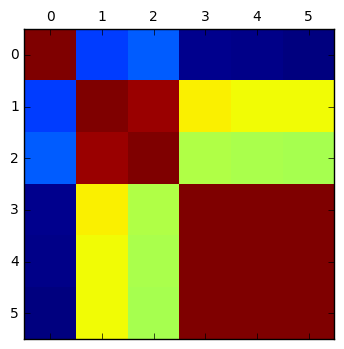

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(processed_dataset.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21e2aed090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f21e0317050>]], dtype=object)

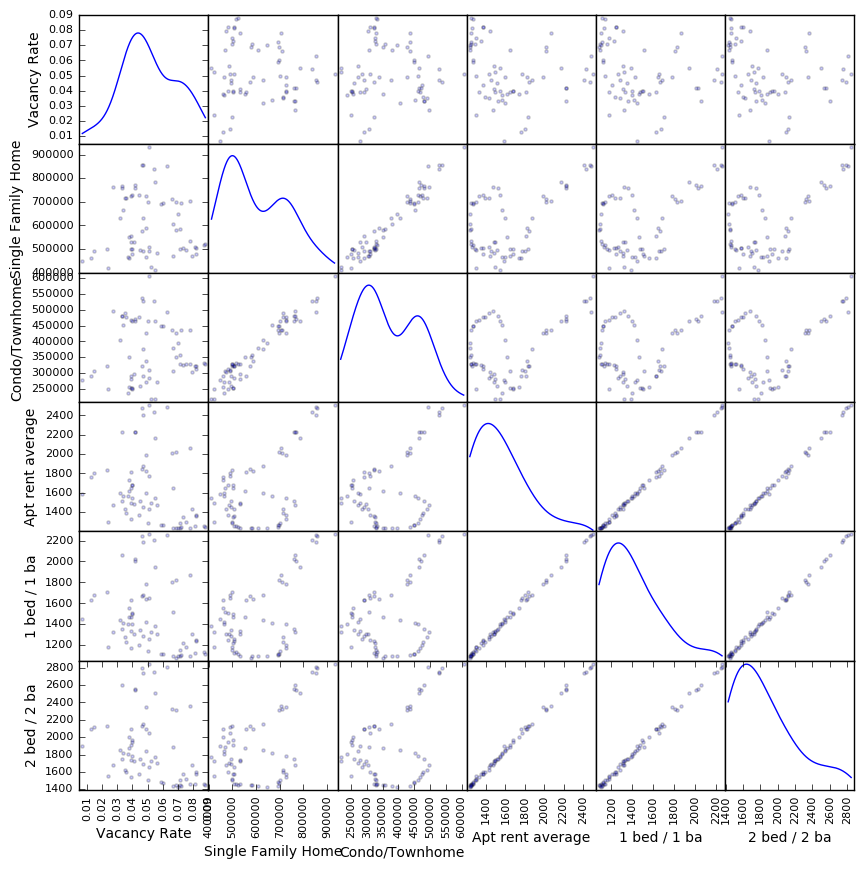

In [124]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(processed_dataset, alpha=0.2, figsize=(10, 10), diagonal='kde')

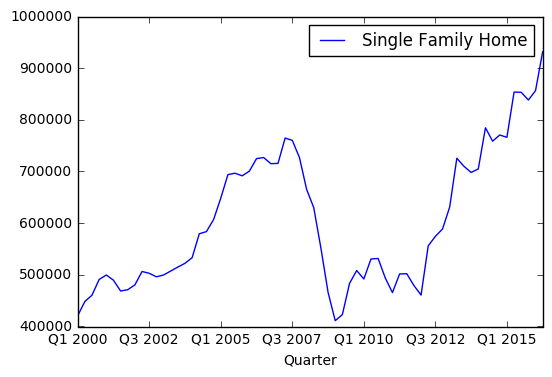

In [129]:
processed_dataset.plot(x = 'Quarter',y = ['Single Family Home'])

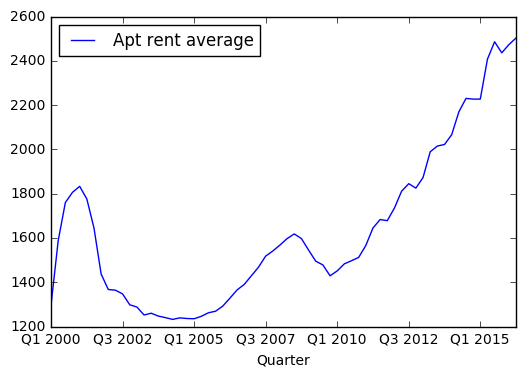

In [130]:
processed_dataset.plot(x = 'Quarter',y = ['Apt rent average'])

Background of the project

1. What we learn from this data set ?
